# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib.models import fbm
from lib import config
from lib import stats
from lib.plots.data import (DataPlotType, stack)
from lib.plots.reg import (RegPlotType, reg)
from lib.plots.config import logspace
from lib.stats import RegType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

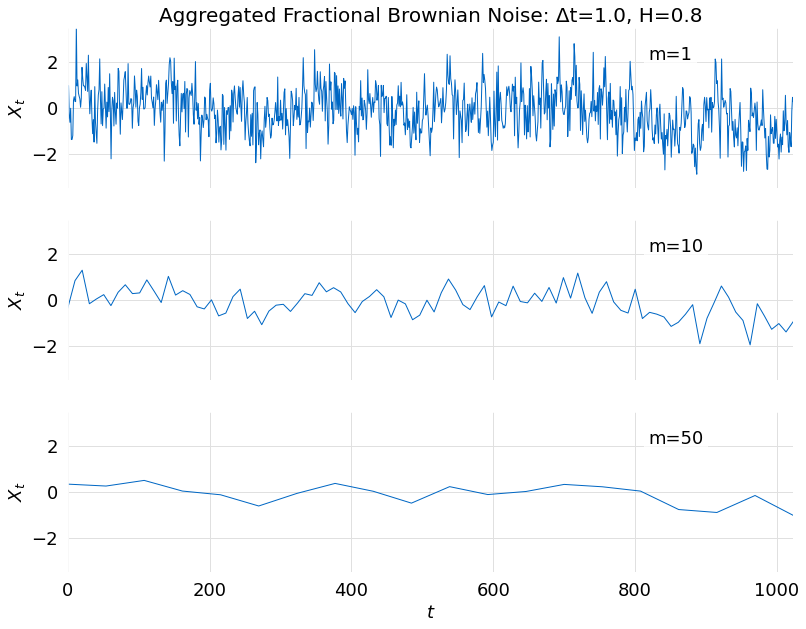

In [3]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

stack(series, ylim=[-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [4]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1209.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           6.29e-57
Time:                        10:30:57   Log-Likelihood:                 182.70
No. Observations:                 100   AIC:                            -361.4
Df Residuals:                      98   BIC:                            -356.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0453      0.020      2.214      0.029       0.005       0.086
x1            -0.4641      0.013    -34.767      0.000      -0.491      -0.438
==============================================================================
Omnibus:                        2.635   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.315
Skew:                          -0.119   Prob(JB):                        0.314
Kurtosis:                       3.706   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

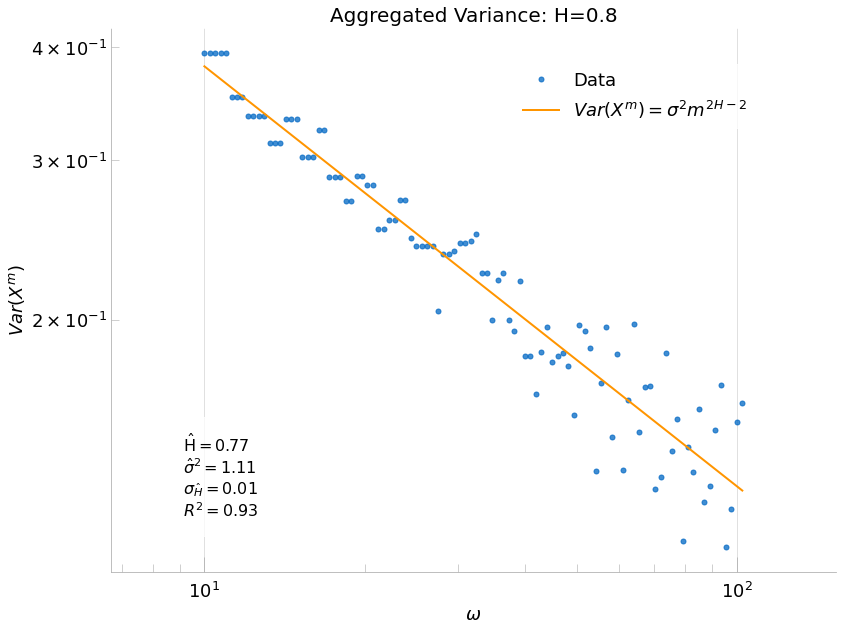

In [5]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

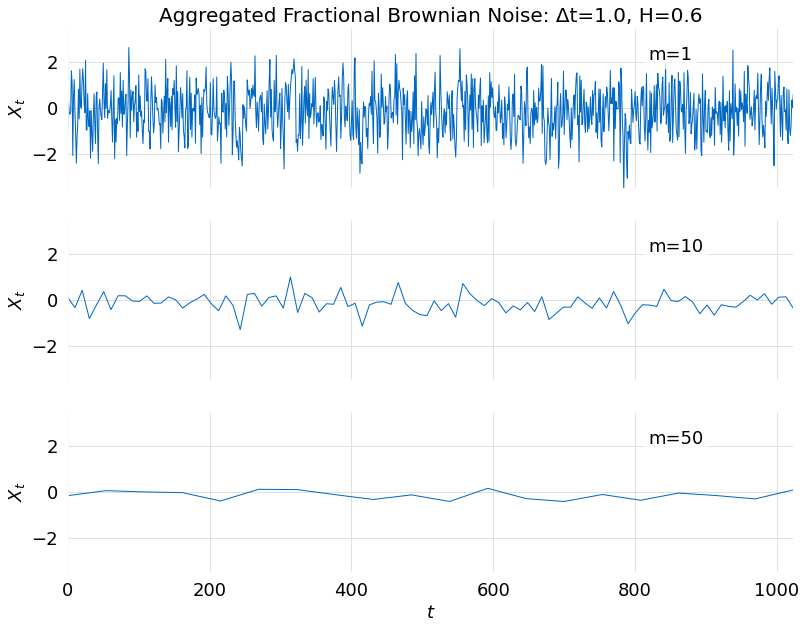

In [6]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

stack(series, ylim=[-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [7]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1933.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           2.57e-66
Time:                        10:30:58   Log-Likelihood:                 114.11
No. Observations:                 100   AIC:                            -224.2
Df Residuals:                      98   BIC:                            -219.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4133      0.041     10.165      0.000       0.333       0.494
x1            -1.1654      0.027    -43.965      0.000      -1.218      -1.113
==============================================================================
Omnibus:                        1.075   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.112
Skew:                          -0.239   Prob(JB):                        0.574
Kurtosis:                       2.802   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

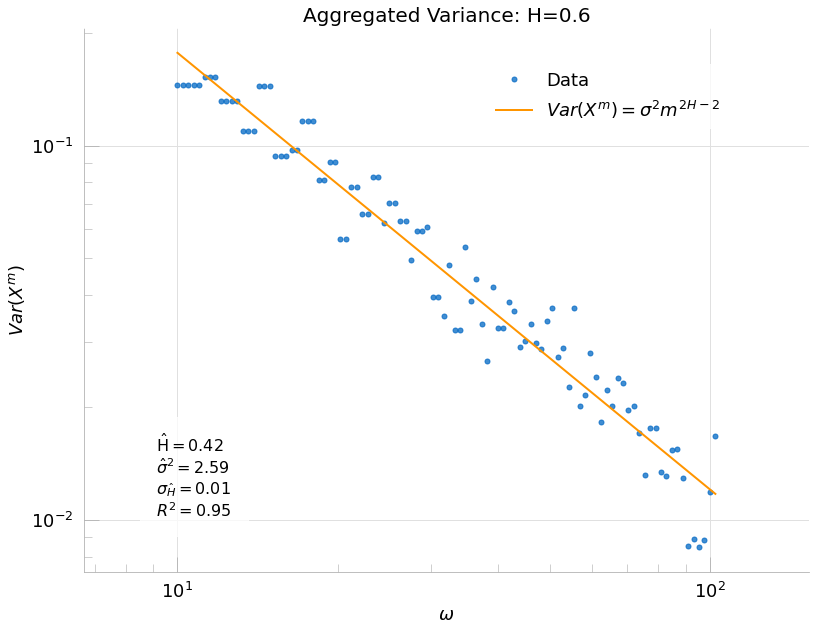

In [8]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

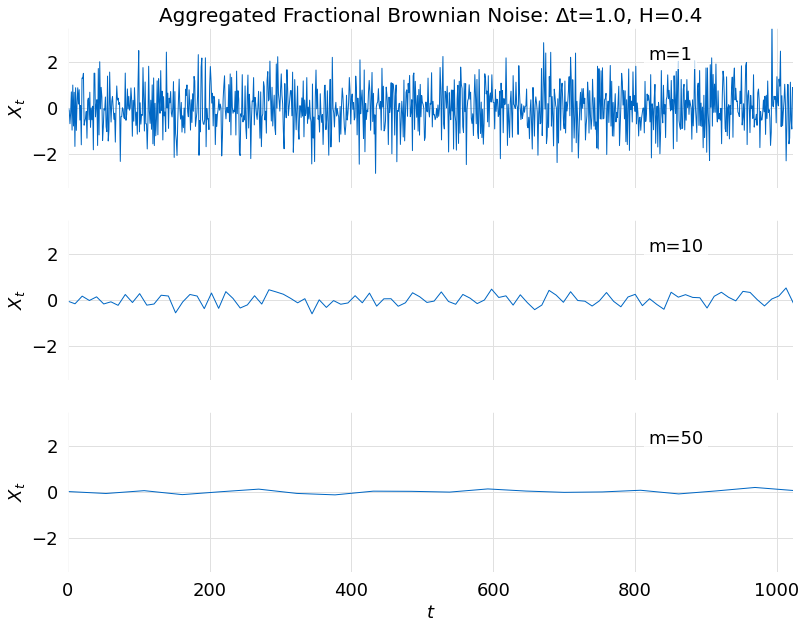

In [9]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

stack(series, ylim=[-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [10]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1452.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.47e-60
Time:                        10:30:58   Log-Likelihood:                 93.529
No. Observations:                 100   AIC:                            -183.1
Df Residuals:                      98   BIC:                            -177.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0419      0.050      0.839      0.404      -0.057       0.141
x1            -1.2408      0.033    -38.101      0.000      -1.305      -1.176
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.035
Skew:                          -0.005   Prob(JB):                        0.983
Kurtosis:                       3.091   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

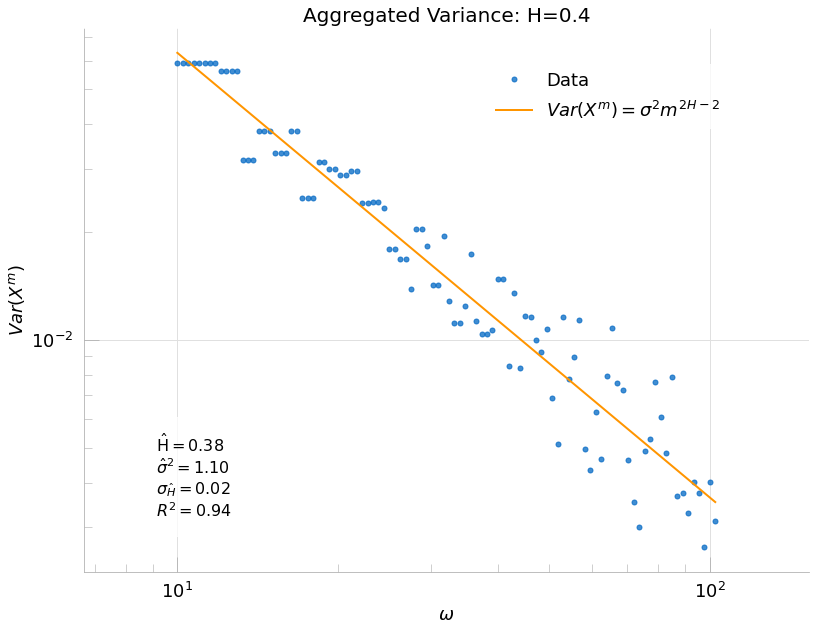

In [11]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

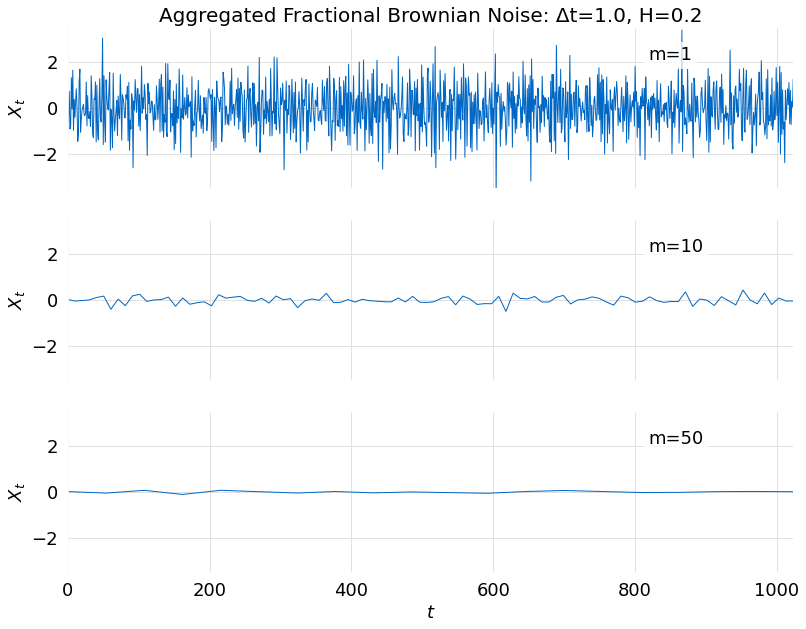

In [12]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

stack(series, ylim=[-3.5, 3.5], x=time, title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

In [13]:
m_vals = logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS_fit(agg_var, m_vals, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1437.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           2.38e-60
Time:                        10:30:59   Log-Likelihood:                 65.233
No. Observations:                 100   AIC:                            -126.5
Df Residuals:                      98   BIC:                            -121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0645      0.066      0.973      0.333      -0.067       0.196
x1            -1.6380      0.043    -37.902      0.000      -1.724      -1.552
==============================================================================
Omnibus:                        4.405   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.731
Skew:                           0.401   Prob(JB):                        0.155
Kurtosis:                       3.501   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

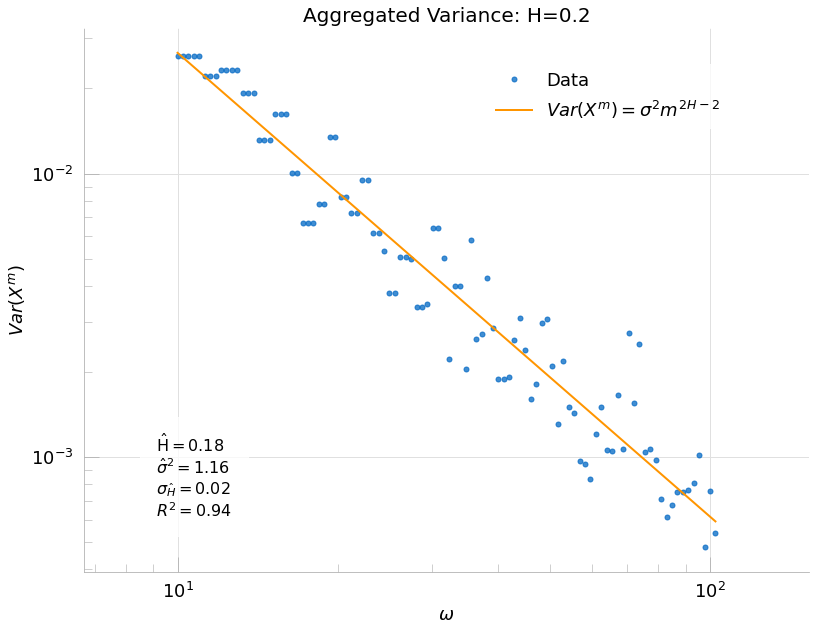

In [14]:
title = title = f"Aggregated Variance: H={H}"
reg(agg_var, m_vals, results, title=title, plot_type=RegPlotType.FBM_AGG_VAR)